In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, on="city", how="left", sort=False)
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

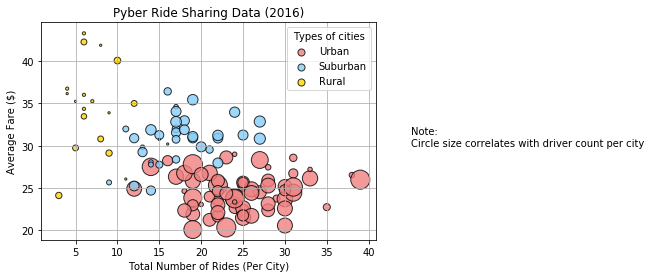

In [7]:
# Obtain the x and y coordinates for each of the three city types
#data["type"].unique()
def getx_axis(dataset, rideType):
    rides_type = dataset.loc[dataset["type"]==rideType]
    rides_type = rides_type.groupby("city").count()
    return rides_type["ride_id"]

def gety_axis(dataset, rideType):
    rides_type = dataset.loc[dataset["type"]==rideType]
    rides_type = rides_type.groupby("city").mean()
    return rides_type["fare"]

def getSize(dataset, rideType):
    rides_type = dataset.loc[dataset["type"]==rideType]
    return rides_type["driver_count"]*5

urban_x    = getx_axis(data, "Urban")
suburban_x = getx_axis(data, "Suburban")
rural_x    = getx_axis(data, "Rural")

urban_y    = gety_axis(data, "Urban")
suburban_y = gety_axis(data, "Suburban")
rural_y    = gety_axis(data, "Rural")

urban_s = getSize(data, "Urban")
suburba_s = getSize(data, "Suburban")
rural_s = getSize(data, "Rural")

# Build the scatter plots for each city types
urban = plt.scatter(urban_x, urban_y, c="lightcoral", edgecolors="black", alpha=0.8, s=urban_s)
suburban = plt.scatter(suburban_x, suburban_y, c="lightskyblue", edgecolors="black", alpha=0.8, s=suburba_s)
rural = plt.scatter(rural_x, rural_y, c="gold", edgecolors="black", alpha=0.8, s=rural_s)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
lgnd = plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rural"), title="Types of cities")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

# Incorporate a text label regarding circle size
plt.text(45, 30, 'Note:\nCircle size correlates with driver count per city')

# Save Figure
plt.savefig('BubblePlot_RideSharingData.png', dpi=100, papertype="letter", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

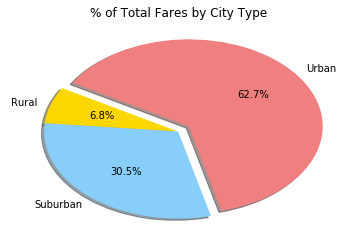

In [8]:
# Calculate Type Percents
tripsbyTypeSum = data.groupby("type").sum()
FaresAverage_City = tripsbyTypeSum["fare"]/tripsbyTypeSum["fare"].sum()
# Build Pie Chart
plt.pie(FaresAverage_City, labels=FaresAverage_City.index, autopct='%1.1f%%', shadow=True, explode=(0,0,0.1), startangle=150, colors=["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('TotalFares_byCityType.png')
# Show Figure
plt.show()

## Total Rides by City Type

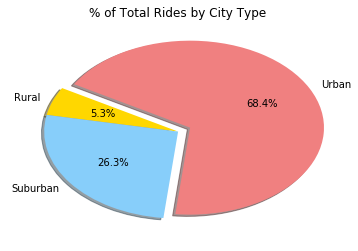

In [9]:
# Calculate Ride Percents
tripsbyTypeTotal = data.groupby("type").count()
tripsAverage_City = tripsbyTypeTotal["ride_id"]/tripsbyTypeTotal["ride_id"].sum()
# Build Pie Chart
plt.pie(tripsAverage_City, labels=tripsAverage_City.index, autopct='%1.1f%%', shadow=True, explode=(0,0,0.1), startangle=150, colors=["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('TotalRides_byCityType.png')
# Show Figure
plt.show()

## Total Drivers by City Type

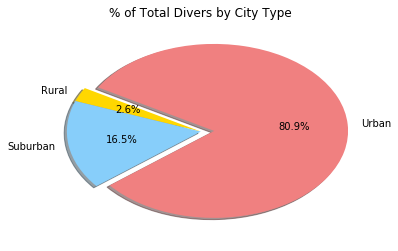

In [10]:
# Calculate Driver Percents
drivers_city_type = data[["city", "driver_count", "type"]].drop_duplicates()
byTypeSum = drivers_city_type.groupby("type").sum()
diversbyRideType = byTypeSum["driver_count"]/byTypeSum["driver_count"].sum()
# Build Pie Charts
plt.pie(diversbyRideType, labels=diversbyRideType.index, autopct='%1.1f%%', shadow=True, explode=(0,0,0.1), startangle=150, colors=["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Divers by City Type")
# Save Figure
plt.savefig('TotalDrivers_byCityType.png')
# Show Figure
plt.show()